In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
año_a_cargar = 2024 #Rango desde 2009 hasta 2024 (considera en 2024 meses hasta Junio)
mes_a_cargar = 6 #1-enero, 2-febrero, 3-marzo, ...
taxy_type = 'yellow' #yellow, green or fhv

In [30]:
def carga_data_taxy_trip(año_a_cargar, mes_a_cargar, taxy_type):
    '''
        Función que carga datos desde la pagina oficial de nueva york y retorna un dataframe con los datos de calidad de aire
        Recibe año y mes a cargar
        Retorna dataframe con datos cargados
    '''
    try:
        if not (2009 <= año_a_cargar <= 2024) or not (1 <= mes_a_cargar <= 12):
            raise ValueError("El año o mes no está dentro del rango permitido")
    except ValueError as e:
            print(e)
    else:
        #print("El año y mes están dentro del rango permitido")
        url = f"https://d37ci6vzurychx.cloudfront.net/trip-data/{taxy_type}_tripdata_{año_a_cargar}-{int(mes_a_cargar):02d}.parquet"
        print(url)
        df = pd.read_parquet(url)
    return df

In [31]:
df = carga_data_taxy_trip(año_a_cargar, mes_a_cargar, taxy_type)

https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-06.parquet


In [32]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-06-01 00:03:46,2024-06-01 00:31:23,1.0,12.50,1.0,N,138,195,1,48.50,7.75,0.5,11.55,0.0,1.0,69.30,0.0,1.75
1,2,2024-06-01 00:55:22,2024-06-01 01:08:24,1.0,4.34,1.0,N,138,7,1,20.50,6.00,0.5,8.40,0.0,1.0,38.15,0.0,1.75
2,1,2024-06-01 00:23:53,2024-06-01 00:32:35,1.0,1.30,1.0,N,166,41,1,10.00,1.00,0.5,3.10,0.0,1.0,15.60,0.0,0.00
3,1,2024-06-01 00:32:24,2024-06-01 00:40:06,1.0,1.20,1.0,N,148,114,1,8.60,3.50,0.5,0.20,0.0,1.0,13.80,2.5,0.00
4,1,2024-06-01 00:51:38,2024-06-01 00:58:17,1.0,1.00,1.0,N,148,249,1,7.20,3.50,0.5,2.00,0.0,1.0,14.20,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3539188,2,2024-06-30 23:07:36,2024-06-30 23:18:35,NaN,2.51,NaN,None,255,148,0,21.09,0.00,0.5,0.00,0.0,1.0,25.09,NaN,NaN
3539189,2,2024-06-30 23:46:07,2024-07-01 00:11:53,NaN,7.55,NaN,None,68,74,0,33.96,0.00,0.5,0.00,0.0,1.0,37.96,NaN,NaN
3539190,2,2024-06-30 23:18:50,2024-06-30 23:35:09,NaN,4.25,NaN,None,41,100,0,21.01,0.00,0.5,0.00,0.0,1.0,25.01,NaN,NaN
3539191,1,2024-06-30 23:33:36,2024-06-30 23:42:37,NaN,1.60,NaN,None,158,231,0,14.41,0.00,0.5,0.00,0.0,1.0,18.41,NaN,NaN


In [33]:
# Obtener el conteo de nulos por columna de df
null_count = df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info.sort_values('Nulos', ascending=False))

                        Nulos  Porcentaje
Airport_fee            410781   11.606629
congestion_surcharge   410781   11.606629
passenger_count        410781   11.606629
RatecodeID             410781   11.606629
store_and_fwd_flag     410781   11.606629
extra                       0    0.000000
total_amount                0    0.000000
improvement_surcharge       0    0.000000
tolls_amount                0    0.000000
tip_amount                  0    0.000000
mta_tax                     0    0.000000
VendorID                    0    0.000000
fare_amount                 0    0.000000
tpep_pickup_datetime        0    0.000000
DOLocationID                0    0.000000
PULocationID                0    0.000000
trip_distance               0    0.000000
tpep_dropoff_datetime       0    0.000000
payment_type                0    0.000000


In [34]:
df['Airport_fee'].unique()

array([ 1.75,  0.  , -1.75,  1.25,   nan])

In [35]:
df['Airport_fee'] = df['Airport_fee'].fillna(0)

In [36]:
def graficar_conteo(colum):
    ret = df[colum].unique()
    if (len(df[colum].unique()) > 30):
        top_30 = df[colum].value_counts().nlargest(30)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_30.index, y=top_30.values, palette="bright")
        plt.xlabel(colum)
        plt.ylabel('Frecuencia (Número de vehículos)')
        plt.title(f'Top 30 {colum}')
        plt.xticks(rotation=90) 
        plt.tight_layout()
        plt.show()
        return top_30
    else:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=df[colum], palette='bright')
        plt.xlabel(colum)
        plt.ylabel('Frecuencia')
        plt.title(f'{colum}')
        plt.xticks(rotation=90) 
        plt.show()
        return df[colum].value_counts()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23228\977413982.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


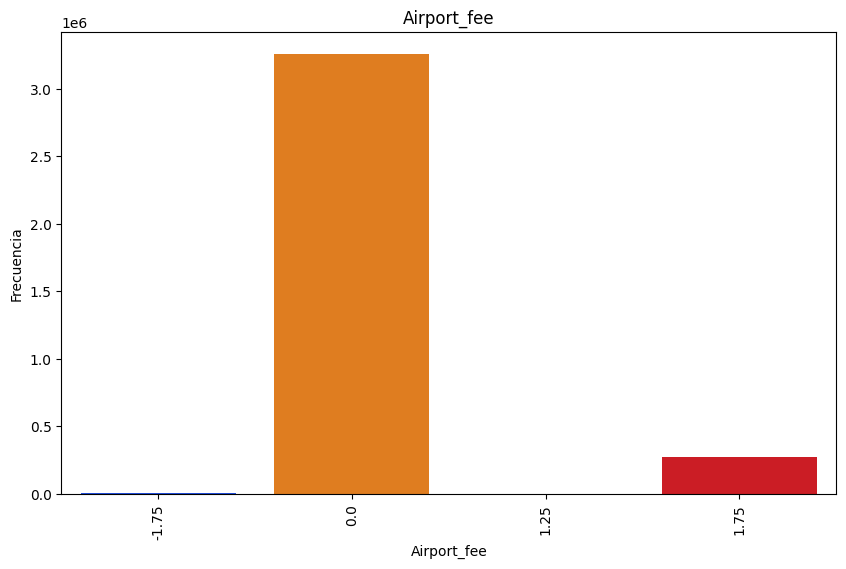

Airport_fee
 0.00    3257089
 1.75     274326
-1.75       7766
 1.25         12
Name: count, dtype: int64


In [37]:
print(graficar_conteo('Airport_fee'))

---
Funcion para contar la cantidad de nulos en los datasets
---
---



In [38]:
def contar_nulos(df):
    '''
        Funcion que imprime los nulos que contienen los dataframes
        parametros:
            df = dataframe a analizar
        retorno:
            Imprime en pantalla
    '''
    # Obtener el conteo de nulos por columna de df
    null_count = df.isnull().sum()

    # Obtener el porcentaje de nulos por columna
    null_percentage = (df.isnull().mean()) * 100

    # Crear un nuevo DataFrame con la información de conteo y porcentaje
    null_info = pd.DataFrame({
        'Nulos': null_count,
        'Porcentaje': null_percentage
    })

    # Imprimir el nuevo DataFrame
    print(null_info.sort_values('Nulos', ascending=False))

Filtrando por datos de aeropuertos:
segun el archivo de zonas de taxis, las zonas de taxis de aeropuertos son los indices de LOCATIONID: 

    OBJECTID        ZONE                        LOCATIONID      CIUDAD
    1	        Newark Airport	            1	            EWR
    132	        JFK Airport	            132	            Queens
    138	        LaGuardia Airport	    138	            Queens

In [39]:
# Filtrando datos por ubicaciones de recogida de de pasajeros sólo en aeropuertos
df_airports = df[(df['PULocationID'] == 1) | (df['PULocationID'] == 132) | (df['PULocationID'] == 138)]

In [40]:
df_airports

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-06-01 00:03:46,2024-06-01 00:31:23,1.0,12.50,1.0,N,138,195,1,48.50,7.75,0.5,11.55,0.00,1.0,69.30,0.0,1.75
1,2,2024-06-01 00:55:22,2024-06-01 01:08:24,1.0,4.34,1.0,N,138,7,1,20.50,6.00,0.5,8.40,0.00,1.0,38.15,0.0,1.75
6,2,2024-06-01 00:01:04,2024-06-01 00:57:48,1.0,18.41,2.0,N,132,48,1,70.00,0.00,0.5,0.15,6.94,1.0,82.84,2.5,1.75
44,2,2024-06-01 00:40:55,2024-06-01 01:42:54,1.0,19.67,2.0,N,132,79,2,70.00,0.00,0.5,0.00,0.00,1.0,75.75,2.5,1.75
50,1,2024-06-01 00:52:10,2024-06-01 01:14:14,1.0,6.20,1.0,N,132,197,3,27.50,2.75,0.5,0.00,0.00,1.0,31.75,0.0,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3538344,1,2024-06-30 22:09:40,2024-06-30 22:40:30,NaN,14.40,NaN,None,132,145,0,54.80,2.75,0.5,8.85,0.00,1.0,67.90,NaN,0.00
3538558,1,2024-06-30 22:52:13,2024-06-30 23:19:01,NaN,10.30,NaN,None,138,230,0,42.90,7.75,0.5,9.23,6.94,1.0,70.82,NaN,0.00
3538687,2,2024-06-30 22:06:30,2024-06-30 22:21:15,NaN,4.56,NaN,None,132,215,0,23.74,0.00,0.5,0.00,0.00,1.0,25.24,NaN,0.00
3538695,2,2024-06-30 22:11:11,2024-06-30 22:29:54,NaN,5.92,NaN,None,138,112,0,25.02,0.00,0.5,0.00,0.00,1.0,26.52,NaN,0.00


In [41]:
contar_nulos(df_airports)

                       Nulos  Porcentaje
congestion_surcharge    1075    0.386581
passenger_count         1075    0.386581
RatecodeID              1075    0.386581
store_and_fwd_flag      1075    0.386581
VendorID                   0    0.000000
extra                      0    0.000000
total_amount               0    0.000000
improvement_surcharge      0    0.000000
tolls_amount               0    0.000000
tip_amount                 0    0.000000
mta_tax                    0    0.000000
payment_type               0    0.000000
fare_amount                0    0.000000
tpep_pickup_datetime       0    0.000000
DOLocationID               0    0.000000
PULocationID               0    0.000000
trip_distance              0    0.000000
tpep_dropoff_datetime      0    0.000000
Airport_fee                0    0.000000


In [42]:
df_airports[df_airports['Airport_fee'].isnull()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee


In [43]:
df_airports = df_airports[df_airports['passenger_count'] > 1]
df_airports

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
66,2,2024-06-01 00:34:43,2024-06-01 00:44:45,3.0,4.89,1.0,N,138,192,2,19.8,6.00,0.5,0.00,0.00,1.0,29.05,0.0,1.75
111,1,2024-06-01 00:17:58,2024-06-01 00:46:05,2.0,11.10,1.0,N,138,230,3,47.8,10.25,0.5,0.00,6.94,1.0,66.49,2.5,1.75
211,2,2024-06-01 00:58:15,2024-06-01 01:39:37,2.0,17.13,2.0,N,132,48,1,70.0,0.00,0.5,16.19,6.94,1.0,98.88,2.5,1.75
274,2,2024-06-01 00:05:17,2024-06-01 00:57:22,2.0,18.18,2.0,N,132,100,1,70.0,0.00,0.5,10.00,6.94,1.0,92.69,2.5,1.75
397,2,2024-06-01 00:10:00,2024-06-01 00:35:56,2.0,9.45,1.0,N,138,100,1,41.5,6.00,0.5,14.61,6.94,1.0,74.80,2.5,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128357,2,2024-06-30 23:19:00,2024-06-30 23:54:15,2.0,17.77,2.0,N,132,230,4,-70.0,0.00,-0.5,0.00,-6.94,-1.0,-82.69,-2.5,-1.75
3128358,2,2024-06-30 23:19:00,2024-06-30 23:54:15,2.0,17.77,2.0,N,132,230,4,70.0,0.00,0.5,0.00,6.94,1.0,82.69,2.5,1.75
3128370,2,2024-06-30 23:13:09,2024-06-30 23:45:50,3.0,17.09,5.0,N,132,164,2,70.0,0.00,0.5,0.00,6.94,1.0,82.69,2.5,1.75
3128378,2,2024-06-30 23:07:05,2024-06-30 23:47:18,5.0,18.34,2.0,N,132,239,1,70.0,0.00,0.5,14.80,0.00,1.0,88.80,2.5,0.00


In [44]:
contar_nulos(df_airports)

                       Nulos  Porcentaje
VendorID                   0         0.0
fare_amount                0         0.0
congestion_surcharge       0         0.0
total_amount               0         0.0
improvement_surcharge      0         0.0
tolls_amount               0         0.0
tip_amount                 0         0.0
mta_tax                    0         0.0
extra                      0         0.0
payment_type               0         0.0
tpep_pickup_datetime       0         0.0
DOLocationID               0         0.0
PULocationID               0         0.0
store_and_fwd_flag         0         0.0
RatecodeID                 0         0.0
trip_distance              0         0.0
passenger_count            0         0.0
tpep_dropoff_datetime      0         0.0
Airport_fee                0         0.0


---
Eliminando columnas que no se utilizarán
---
---

In [45]:
columnas = ['VendorID', 'store_and_fwd_flag','extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']

In [46]:
df_airports = df_airports.drop(columnas, axis=1)
df_airports

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
66,2024-06-01 00:34:43,2024-06-01 00:44:45,3.0,4.89,1.0,138,192,2,19.8,29.05
111,2024-06-01 00:17:58,2024-06-01 00:46:05,2.0,11.10,1.0,138,230,3,47.8,66.49
211,2024-06-01 00:58:15,2024-06-01 01:39:37,2.0,17.13,2.0,132,48,1,70.0,98.88
274,2024-06-01 00:05:17,2024-06-01 00:57:22,2.0,18.18,2.0,132,100,1,70.0,92.69
397,2024-06-01 00:10:00,2024-06-01 00:35:56,2.0,9.45,1.0,138,100,1,41.5,74.80
...,...,...,...,...,...,...,...,...,...,...
3128357,2024-06-30 23:19:00,2024-06-30 23:54:15,2.0,17.77,2.0,132,230,4,-70.0,-82.69
3128358,2024-06-30 23:19:00,2024-06-30 23:54:15,2.0,17.77,2.0,132,230,4,70.0,82.69
3128370,2024-06-30 23:13:09,2024-06-30 23:45:50,3.0,17.09,5.0,132,164,2,70.0,82.69
3128378,2024-06-30 23:07:05,2024-06-30 23:47:18,5.0,18.34,2.0,132,239,1,70.0,88.80


Como existe presencia de datos negativos en el dataset y no debe haberlos, se cambian a positivos

In [47]:
df_airports[df_airports['fare_amount'] < 0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
4195,2024-06-01 00:11:28,2024-06-01 00:24:21,3.0,4.88,3.0,132,10,4,-41.9,-43.90
4667,2024-06-01 00:10:24,2024-06-01 00:15:42,2.0,2.32,1.0,132,216,2,-11.4,-15.65
17998,2024-06-01 07:20:27,2024-06-01 07:54:33,2.0,16.70,2.0,132,100,2,-70.0,-82.69
18069,2024-06-01 07:45:32,2024-06-01 07:52:35,2.0,1.90,1.0,132,132,3,-10.7,-13.95
23368,2024-06-01 09:00:42,2024-06-01 09:00:57,2.0,0.00,1.0,138,138,3,-3.0,-11.25
...,...,...,...,...,...,...,...,...,...,...
3126498,2024-06-30 23:56:27,2024-07-01 02:06:59,4.0,27.11,4.0,138,265,4,-215.1,-249.67
3126731,2024-06-30 23:28:22,2024-06-30 23:28:37,3.0,0.00,1.0,132,132,2,-3.0,-7.25
3128066,2024-06-30 23:42:29,2024-07-01 00:15:08,2.0,18.30,2.0,132,230,4,-70.0,-82.69
3128194,2024-06-30 23:21:04,2024-06-30 23:33:07,4.0,5.55,1.0,132,216,2,-22.6,-26.85


In [48]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75475 entries, 66 to 3128400
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   75475 non-null  datetime64[us]
 1   tpep_dropoff_datetime  75475 non-null  datetime64[us]
 2   passenger_count        75475 non-null  float64       
 3   trip_distance          75475 non-null  float64       
 4   RatecodeID             75475 non-null  float64       
 5   PULocationID           75475 non-null  int32         
 6   DOLocationID           75475 non-null  int32         
 7   payment_type           75475 non-null  int64         
 8   fare_amount            75475 non-null  float64       
 9   total_amount           75475 non-null  float64       
dtypes: datetime64[us](2), float64(5), int32(2), int64(1)
memory usage: 5.8 MB


In [49]:
columnas = ['fare_amount', 'total_amount']

In [50]:
for col in columnas:
    df_airports[col] = df_airports[col].abs()

In [51]:
df_airports[df_airports['fare_amount'] <= 0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
161536,2024-06-02 15:26:03,2024-06-02 17:36:53,3.0,110.80,5.0,132,265,1,0.0,60.26
232370,2024-06-03 11:12:57,2024-06-03 11:30:07,2.0,8.46,2.0,132,93,2,0.0,3.25
350743,2024-06-04 14:49:48,2024-06-04 15:54:39,4.0,18.08,2.0,132,48,1,0.0,15.97
401519,2024-06-04 21:40:40,2024-06-04 21:40:54,3.0,0.00,1.0,132,132,2,0.0,3.25
401520,2024-06-04 21:40:40,2024-06-04 21:40:54,3.0,0.00,1.0,132,132,2,0.0,3.25
417443,2024-06-04 23:12:36,2024-06-04 23:12:36,2.0,0.00,5.0,132,264,2,0.0,1.75
1121631,2024-06-11 15:33:42,2024-06-11 15:34:02,2.0,0.00,2.0,132,132,2,0.0,3.25
1233144,2024-06-12 15:43:53,2024-06-12 17:04:30,2.0,18.90,2.0,132,163,2,0.0,5.75
1233145,2024-06-12 15:43:53,2024-06-12 17:04:30,2.0,18.90,2.0,132,163,2,0.0,5.75
1251347,2024-06-12 18:45:19,2024-06-12 18:47:04,2.0,0.30,2.0,132,132,3,0.0,0.00


In [52]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75475 entries, 66 to 3128400
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   75475 non-null  datetime64[us]
 1   tpep_dropoff_datetime  75475 non-null  datetime64[us]
 2   passenger_count        75475 non-null  float64       
 3   trip_distance          75475 non-null  float64       
 4   RatecodeID             75475 non-null  float64       
 5   PULocationID           75475 non-null  int32         
 6   DOLocationID           75475 non-null  int32         
 7   payment_type           75475 non-null  int64         
 8   fare_amount            75475 non-null  float64       
 9   total_amount           75475 non-null  float64       
dtypes: datetime64[us](2), float64(5), int32(2), int64(1)
memory usage: 5.8 MB


In [53]:
df_airports.to_csv(f'../Datasets/Clean Data/airports_{taxy_type}_taxi_trips({mes_a_cargar}.{año_a_cargar}).csv', index=False)

Se guarda en dataframe en archivo csv